In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('housingdata/housing.data', delim_whitespace=True, header=None)
col_study = ['ZN', 'INDUS', 'NOX', 'RM']
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
            'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_names

In [21]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


# Exploratory Data Analysis (EDA)
#### Attribute Information:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq. ft
3. INDUS: proportion of non-retail besiness acres per town
4. CHAS: Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five bBoston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value praperty-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: $1000(Bk-0.63)^2$ where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. Median value of owner-occupied homes in $1000's

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


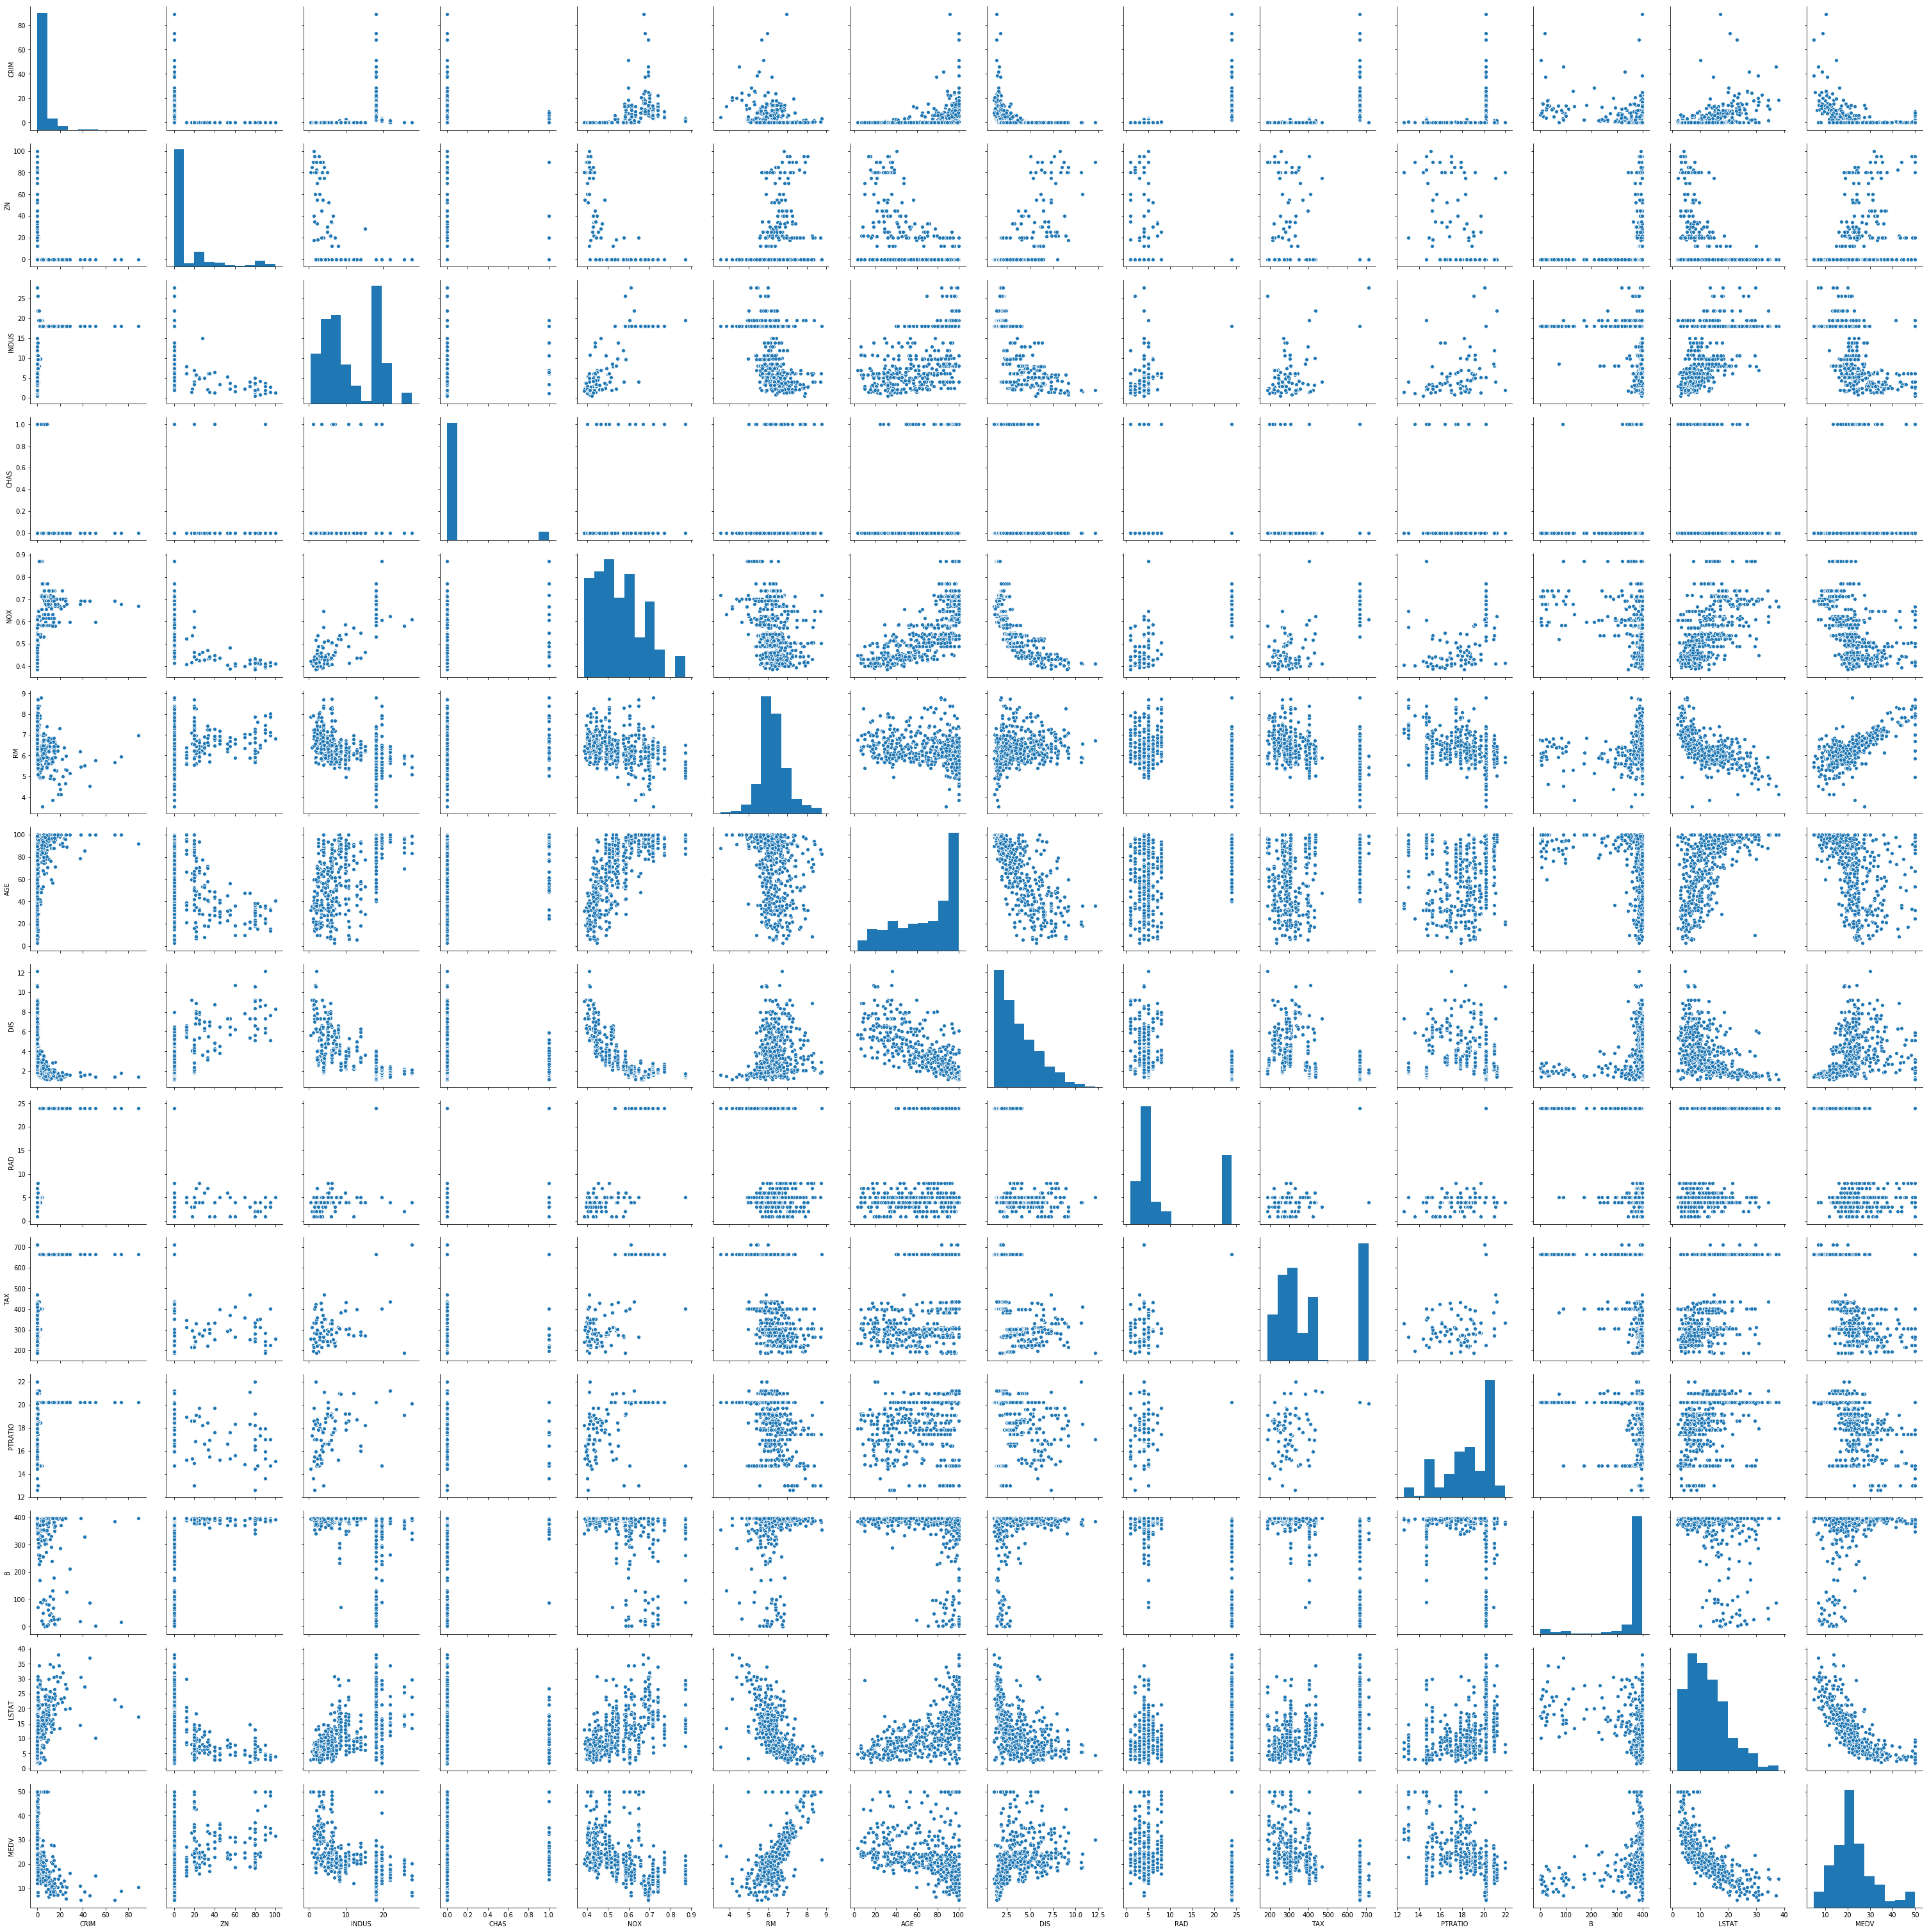

In [16]:
sns.pairplot(df, height=3, aspect= 1);
plt.show()

In [17]:
# Correlation Analysis
pd.options.display.float_format = '{:,.2f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


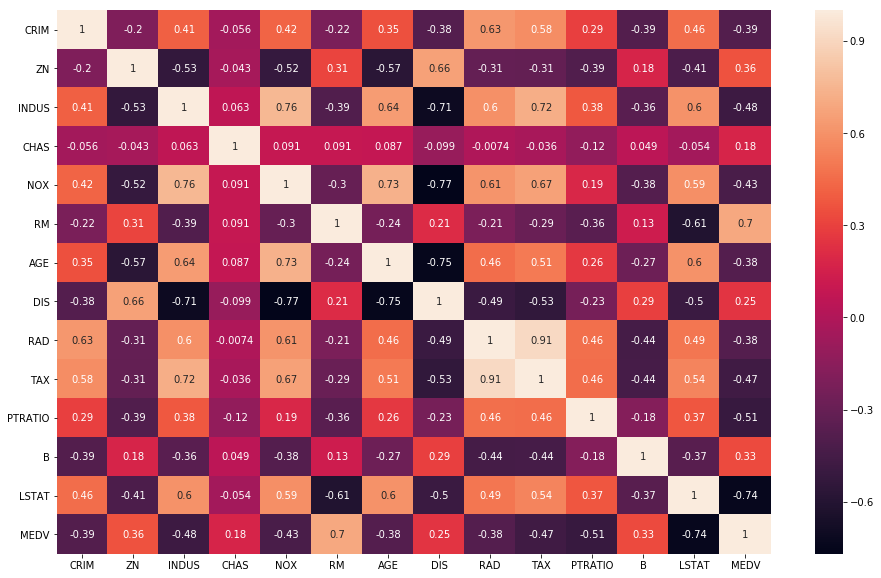

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Linear Regression with Scikit-Learn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [33]:
X = df['RM'].values.reshape(-1, 1) # Reshape to a matrix used by Scikit-learn

In [25]:
y = df['MEDV'].values # Target value used to model

In [26]:
model = LinearRegression()

In [27]:
model.fit(X,y);

In [28]:
model.coef_

array([9.10210898])

In [29]:
model.intercept_

-34.67062077643857

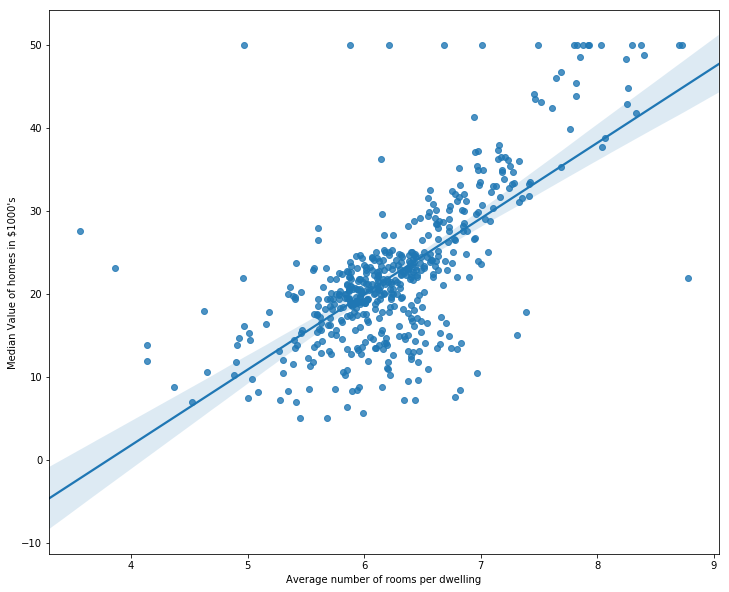

In [30]:
plt.figure(figsize=(12,10));
sns.regplot(X,y);
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median Value of homes in $1000's")
plt.show()

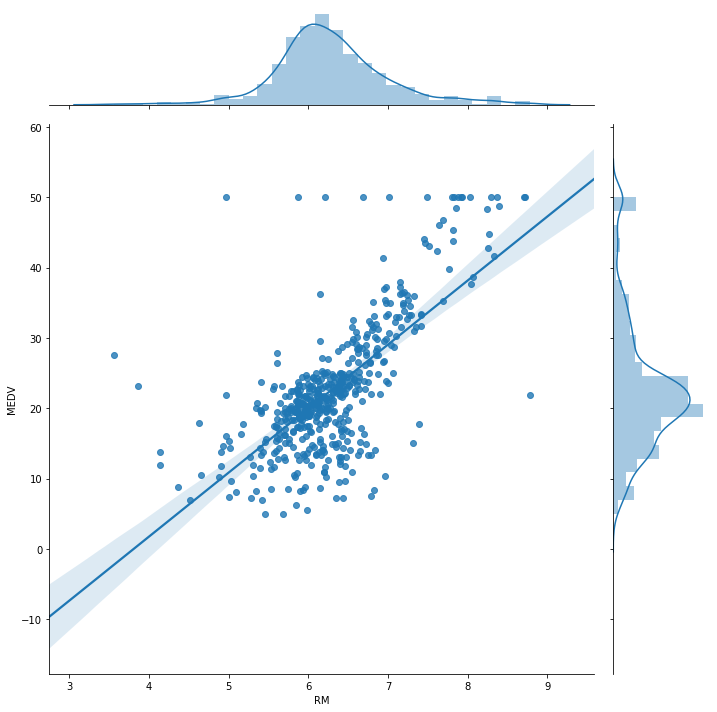

In [31]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=10)
plt.show()

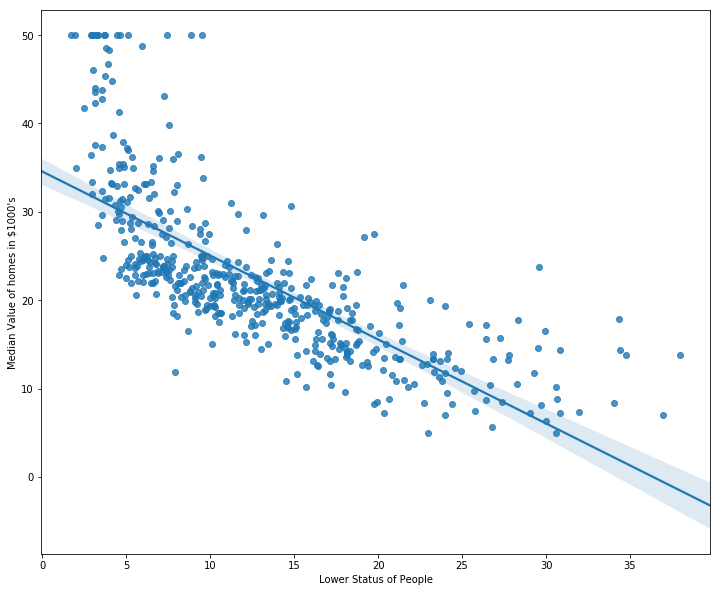

In [34]:
X2 = df['LSTAT'].values.reshape(-1,1)
y2 = df['MEDV'].values
model.fit(X2,y2)
plt.figure(figsize=(12,10));
sns.regplot(X2,y2);
plt.xlabel('Lower Status of People')
plt.ylabel("Median Value of homes in $1000's")
plt.show()

## Robust Regression

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


### RANdom SAmple Consensus (RANSAC) Algorithm

link = http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

Each iteration performs the following steps:
1. Select ```min_samples``` random samples from the original data and check whether the set of data is valid (```is_data_valid```)
2. Fit a model to the random subset (```base_estimator.fit```) and check whether the estimated model is valid (```is_model_valid```)
3. Classify all data as inliers or outliers by valculating the residuals to the estimated model (```base_estimator.predict(X) - y```) - all data samples with absolute residuals smaller than the ```residual_threshold``` are considered as inliers.
4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has a better score.

In [75]:
from sklearn.linear_model import RANSACRegressor

In [87]:
ransac = RANSACRegressor()

In [88]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X,y);

In [89]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [90]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1)) # Our prediction

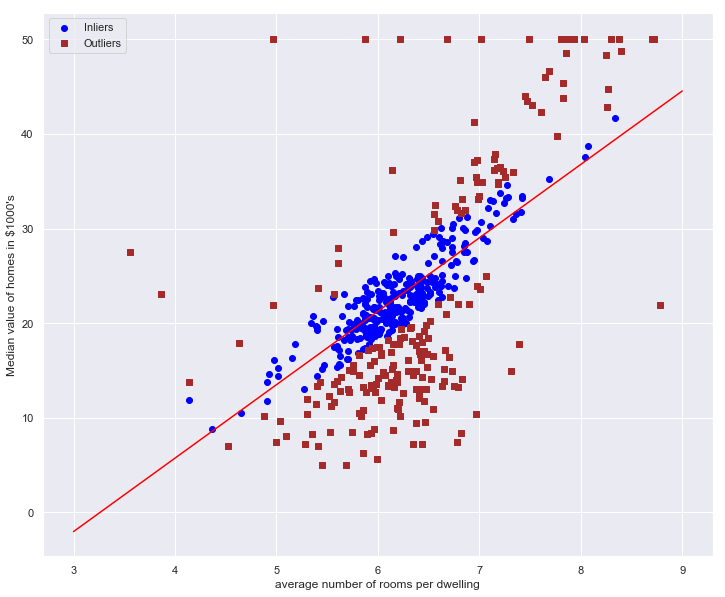

In [91]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of homes in $1000\'s')
plt.legend(loc='upper left')
plt.show()

In [92]:
ransac.estimator_.coef_

array([7.75987516])

In [93]:
ransac.estimator_.intercept_

-25.29924570266321

## % Lower Status in Population (RANSAC Method)

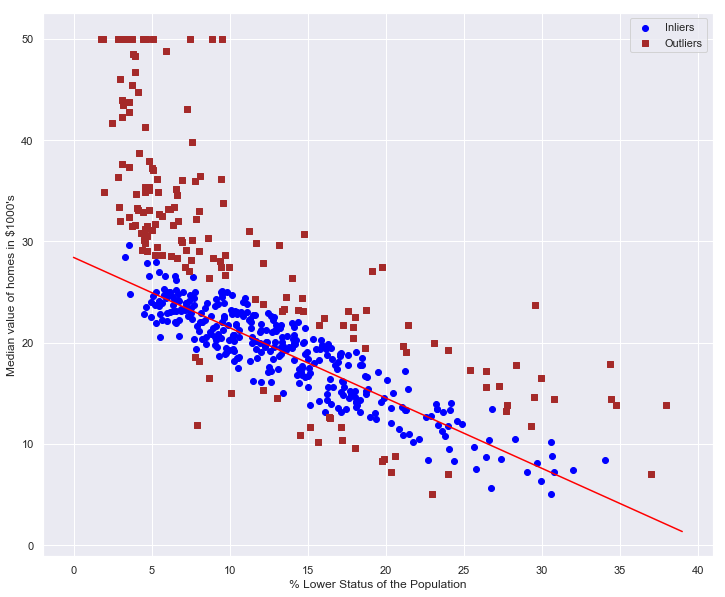

In [104]:
# Lower status
ransac2 = RANSACRegressor()
X2 = df['LSTAT'].values.reshape(-1,1)
y2 = df['MEDV'].values
ransac2.fit(X2,y2);
inlier_mask2 = ransac2.inlier_mask_
outlier_mask2 = np.logical_not(inlier_mask2)
line_X2 = np.arange(0,40,1)
line_y_ransac2 = ransac2.predict(line_X2.reshape(-1,1)) # Our prediction
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X2[inlier_mask2], y2[inlier_mask2], c='blue', marker='o', label='Inliers')
plt.scatter(X2[outlier_mask2], y2[outlier_mask2], c='brown', marker='s', label='Outliers')
plt.plot(line_X2, line_y_ransac2, color='red')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Median value of homes in $1000\'s')
plt.legend(loc='upper right')
plt.show()

In [105]:
ransac2.estimator_.coef_

array([-0.69430682])

In [107]:
ransac2.estimator_.intercept_

28.418239046089667

## Performance Evaluation of Regression Model

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = df['LSTAT'].values.reshape(-1,1)
# X = df.iloc[:,:-1].values

In [110]:
y = df['MEDV'].values

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

In [112]:
lr = LinearRegression()

In [114]:
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Method 1: Residual Analysis

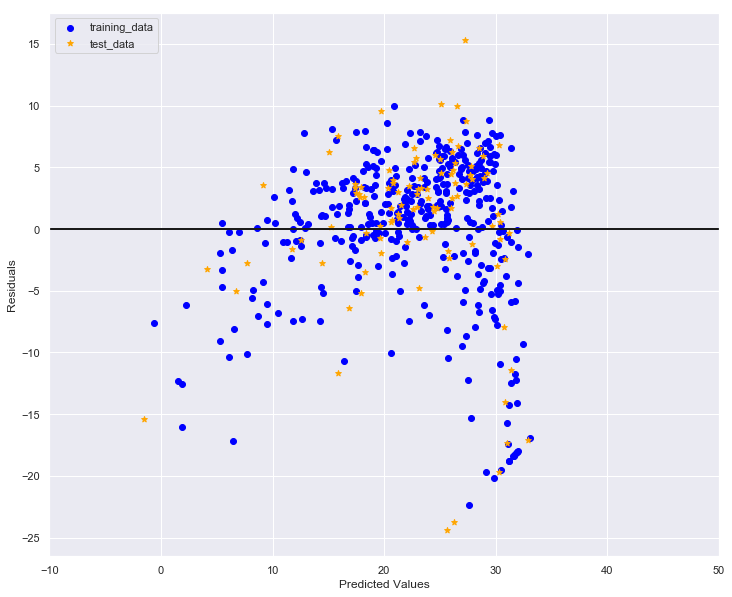

In [118]:
plt.figure(figsize=(12,10))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='training_data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='test_data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

# Method 2: Mean Squared Error (MSE) 

$$MSE = \frac{1}{n}\sum_{i=1}^n(y_{i}-\hat{y}_i)^2$$


* The average value of the Sums of Squared Error cost function
* Useful for comparing different regression models
* For tuning parameters via a grid search and cross-validation

In [129]:
from sklearn.metrics import mean_squared_error

In [122]:
mean_squared_error(y_train, y_train_pred)

36.523966406959666

In [124]:
mean_squared_error(y_test, y_test_pred)

46.33630536002592

# Method 3: Coefficient of Determination $R^{2}$
$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of Squared Errors

SST: Total sum of Squares

In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_score(y_train, y_train_pred)

0.571031588576562

In [132]:
r2_score(y_test, y_test_pred)

0.43095672846187616

# What does a Near Perfect Model look like?

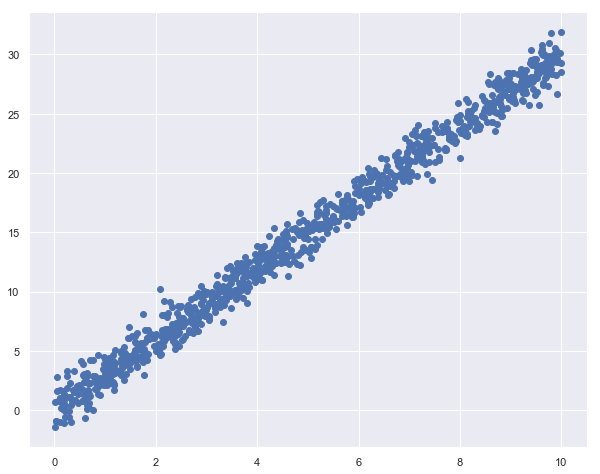

In [133]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.show()

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1,1), y_train)

y_train_pred = model.predict(X_train.reshape(-1,1))
y_test_pred = model.predict(X_test.reshape(-1,1))

# Method 1

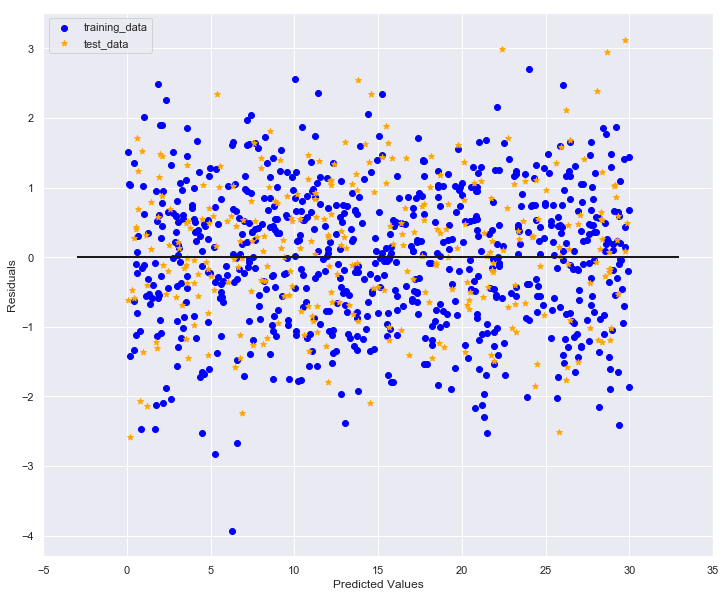

In [141]:
plt.figure(figsize=(12,10))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='training_data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='test_data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.show()

# Method 2: Mean Squared Error

In [142]:
mean_squared_error(y_train, y_train_pred)

1.0134763080679658

In [143]:
mean_squared_error(y_test, y_test_pred)

1.0007546757094816

# Method 3: Coefficient of Determination, $R^2$

In [144]:
r2_score(y_train, y_train_pred)

0.98672845986473

In [145]:
r2_score(y_test, y_test_pred)

0.9869104054910696

# Yet to be covered

* Mean Absolute Error
* Stratified Shuffle Split
* Feature Engineering, E.g, Combining Features, Designing derivative features
* Data preparation, E.g, missing values etc.
* Categorical features
* Transform data/feature scaling. Scikit-learn Pipeline
* Fine Tuning E.g, Grid Search, Randomized Search
* Ensemble Methods